In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
%matplotlib inline

pd.options.display.max_columns = 50
pd.options.display.max_colwidth = 300

## Predicting "Greenness" Of Content

This dataset comes from [stumbleupon](https://www.stumbleupon.com/), a web page recommender and was made available [here](https://www.kaggle.com/c/stumbleupon/download/train.tsv)

A description of the columns is below

FieldName|Type|Description
---------|----|-----------
url|string|Url of the webpage to be classified
urlid|integer| StumbleUpon's unique identifier for each url
boilerplate|json|Boilerplate text
alchemy_category|string|Alchemy category (per the publicly available Alchemy API found at www.alchemyapi.com)
alchemy_category_score|double|Alchemy category score (per the publicly available Alchemy API found at www.alchemyapi.com)
avglinksize| double|Average number of words in each link
commonLinkRatio_1|double|# of links sharing at least 1 word with 1 other links / # of links
commonLinkRatio_2|double|# of links sharing at least 1 word with 2 other links / # of links
commonLinkRatio_3|double|# of links sharing at least 1 word with 3 other links / # of links
commonLinkRatio_4|double|# of links sharing at least 1 word with 4 other links / # of links
compression_ratio|double|Compression achieved on this page via gzip (measure of redundancy)
embed_ratio|double|Count of number of <embed> usage
frameBased|integer (0 or 1)|A page is frame-based (1) if it has no body markup but have a frameset markup
frameTagRatio|double|Ratio of iframe markups over total number of markups
hasDomainLink|integer (0 or 1)|True (1) if it contains an <a> with an url with domain
html_ratio|double|Ratio of tags vs text in the page
image_ratio|double|Ratio of <img> tags vs text in the page
is_news|integer (0 or 1) | True (1) if StumbleUpon's news classifier determines that this webpage is news
lengthyLinkDomain| integer (0 or 1)|True (1) if at least 3 <a> 's text contains more than 30 alphanumeric characters
linkwordscore|double|Percentage of words on the page that are in hyperlink's text
news_front_page| integer (0 or 1)|True (1) if StumbleUpon's news classifier determines that this webpage is front-page news
non_markup_alphanum_characters|integer| Page's text's number of alphanumeric characters
numberOfLinks|integer Number of <a>|markups
numwords_in_url| double|Number of words in url
parametrizedLinkRatio|double|A link is parametrized if it's url contains parameters or has an attached onClick event
spelling_errors_ratio|double|Ratio of words not found in wiki (considered to be a spelling mistake)
label|integer (0 or 1)|User-determined label. Either evergreen (1) or non-evergreen (0); available for train.tsv only

### What are 'evergreen' sites?
- These are websites that are always relevant like recipes or reviews (as opposed to current events)
- Look at some examples

In [6]:
data = pd.read_csv('train.csv', sep='\t', na_values={'is_news' : '?'}).fillna(0)

# Extract the title and body from the boilerplate JSON text
data['title'] = data.boilerplate.map(lambda x: json.loads(x).get('title', ''))
data['body'] = data.boilerplate.map(lambda x: json.loads(x).get('body', ''))

In [9]:
data[['title', 'label']].head()
data.columns

Index([u'url', u'urlid', u'boilerplate', u'alchemy_category',
       u'alchemy_category_score', u'avglinksize', u'commonlinkratio_1',
       u'commonlinkratio_2', u'commonlinkratio_3', u'commonlinkratio_4',
       u'compression_ratio', u'embed_ratio', u'framebased', u'frameTagRatio',
       u'hasDomainLink', u'html_ratio', u'image_ratio', u'is_news',
       u'lengthyLinkDomain', u'linkwordscore', u'news_front_page',
       u'non_markup_alphanum_characters', u'numberOfLinks', u'numwords_in_url',
       u'parametrizedLinkRatio', u'spelling_errors_ratio', u'label', u'title',
       u'body'],
      dtype='object')

#### Does being a news site effect green-ness?

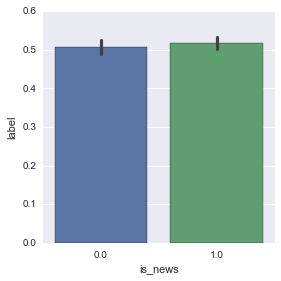

In [25]:
# TODO. Hint: use factorplot from seaborn.
sns.factorplot(data=data, x='is_news', y='label', kind='bar')
plt.show()

According to the plot above, it does not look like being a news site has an effect on greeness.

#### Does the website category effect green-ness?

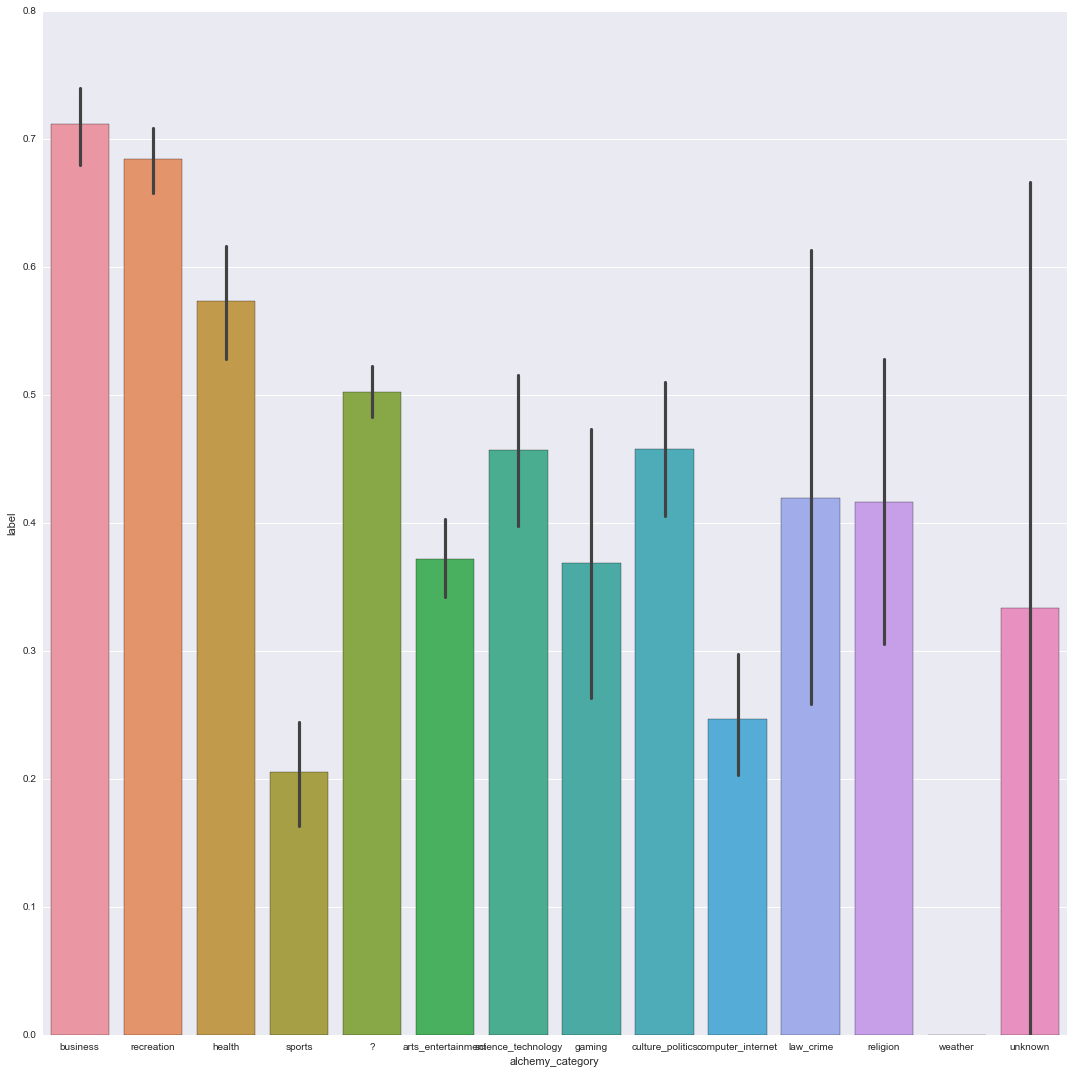

In [31]:
# TODO
sns.factorplot(data=data, x='alchemy_category', y='label', kind='bar', size=(15))
plt.show()

According to this plot, it does appear that alchemy category has an effect on greeness.

#### Does the image ratio effect green-ness?

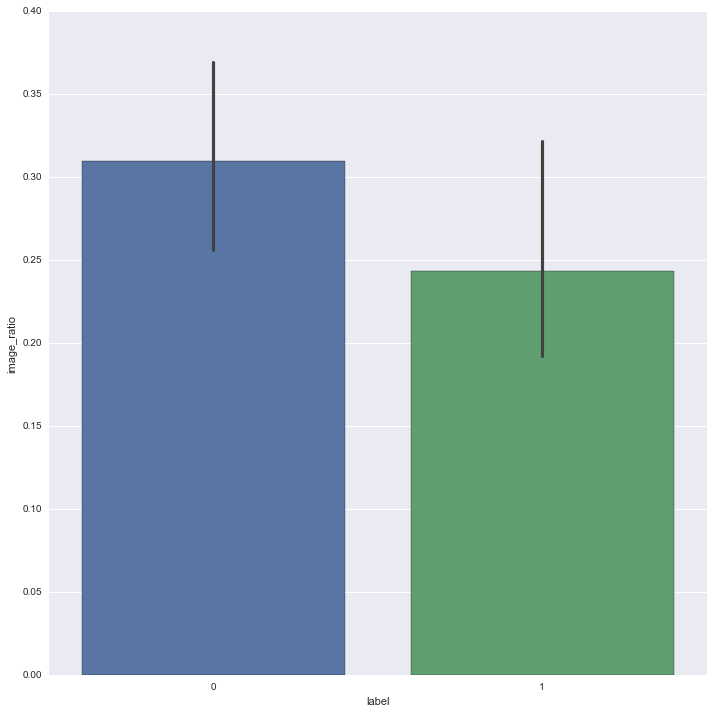

In [38]:
# TODO
g = sns.factorplot(data=data, x='label', y='image_ratio', size=10, kind='bar')
g.despine(left=True)
plt.show()

#### Fit a logistic regression model using statsmodels
- Test different features that may be valuable
- Examine the coefficients, does the feature increase or decrease the effect of being evergreen?

In [52]:
import statsmodels.formula.api as sm

model = sm.logit(
    "label ~ alchemy_category",
    data = data
).fit()

model.summary()

         Current function value: 0.649452
         Iterations: 35


//anaconda/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  label   No. Observations:                 7395
Model:                          Logit   Df Residuals:                     7381
Method:                           MLE   Df Model:                           13
Date:                Tue, 25 Oct 2016   Pseudo R-squ.:                 0.06256
Time:                        19:18:16   Log-Likelihood:                -4802.7
converged:                      False   LL-Null:                       -5123.2
                                        LLR p-value:                1.372e-128
==========================================================================================================
                                             coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Intercept                                  0.0085      0.041      0.207      0.836        -0.072     0.090
alchemy_category[T.arts_entertainment]    -0.5324      0.079     -6.731      0.000        -0.687    -0.377
alchemy_category[T.business]               0.8935      0.085     10.499      0.000         0.727     1.060
alchemy_category[T.computer_internet]     -1.1253      0.141     -7.979      0.000        -1.402    -0.849
alchemy_category[T.culture_politics]      -0.1780      0.116     -1.535      0.125        -0.405     0.049
alchemy_category[T.gaming]                -0.5475      0.241     -2.269      0.023        -1.021    -0.074
alchemy_category[T.health]                 0.2861      0.099      2.892      0.004         0.092     0.480
alchemy_category[T.law_crime]             -0.3340      0.366     -0.912      0.362        -1.052     0.384
alchemy_category[T.recreation]             0.7650      0.074     10.340      0.000         0.620     0.910
alchemy_category[T.religion]              -0.3450      0.243     -1.422      0.155        -0.820     0.130
alchemy_category[T.science_technology]    -0.1820      0.125     -1.455      0.146        -0.427     0.063
alchemy_category[T.sports]                -1.3623      0.134    -10.199      0.000        -1.624    -1.100
alchemy_category[T.unknown]               -0.7017      0.867     -0.809      0.418        -2.401     0.998
alchemy_category[T.weather]              -18.1423   4331.844     -0.004      0.997     -8508.400  8472.115
==========================================================================================================
"""

In [53]:
import statsmodels.formula.api as sm

model = sm.logit(
    "label ~ alchemy_category + image_ratio",
    data = data
).fit()

model.summary()

         Current function value: 0.649291
         Iterations: 35


//anaconda/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  label   No. Observations:                 7395
Model:                          Logit   Df Residuals:                     7380
Method:                           MLE   Df Model:                           14
Date:                Tue, 25 Oct 2016   Pseudo R-squ.:                 0.06279
Time:                        19:18:44   Log-Likelihood:                -4801.5
converged:                      False   LL-Null:                       -5123.2
                                        LLR p-value:                3.054e-128
==========================================================================================================
                                             coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Intercept                                  0.0134      0.041      0.324      0.746        -0.068     0.095
alchemy_category[T.arts_entertainment]    -0.5320      0.079     -6.725      0.000        -0.687    -0.377
alchemy_category[T.business]               0.8941      0.085     10.505      0.000         0.727     1.061
alchemy_category[T.computer_internet]     -1.1239      0.141     -7.968      0.000        -1.400    -0.847
alchemy_category[T.culture_politics]      -0.1772      0.116     -1.528      0.127        -0.405     0.050
alchemy_category[T.gaming]                -0.5452      0.241     -2.259      0.024        -1.018    -0.072
alchemy_category[T.health]                 0.2827      0.099      2.857      0.004         0.089     0.477
alchemy_category[T.law_crime]             -0.3370      0.366     -0.920      0.358        -1.055     0.381
alchemy_category[T.recreation]             0.7684      0.074     10.378      0.000         0.623     0.914
alchemy_category[T.religion]              -0.3441      0.243     -1.418      0.156        -0.820     0.131
alchemy_category[T.science_technology]    -0.1835      0.125     -1.467      0.142        -0.429     0.062
alchemy_category[T.sports]                -1.3585      0.134    -10.169      0.000        -1.620    -1.097
alchemy_category[T.unknown]               -0.6742      0.868     -0.777      0.437        -2.375     1.026
alchemy_category[T.weather]              -18.0460   4086.831     -0.004      0.996     -8028.088  7991.996
image_ratio                               -0.0205      0.014     -1.419      0.156        -0.049     0.008
==========================================================================================================
"""

In [41]:
# TODO
import statsmodels.formula.api as sm

model = sm.logit(
    "label ~ alchemy_category * image_ratio",
    data = data
).fit()

model.summary()

         Current function value: 0.646179
         Iterations: 35


//anaconda/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  label   No. Observations:                 7395
Model:                          Logit   Df Residuals:                     7367
Method:                           MLE   Df Model:                           27
Date:                Tue, 25 Oct 2016   Pseudo R-squ.:                 0.06728
Time:                        16:26:44   Log-Likelihood:                -4778.5
converged:                      False   LL-Null:                       -5123.2
                                        LLR p-value:                6.290e-128
======================================================================================================================
                                                         coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------------------
Intercept                                              0.0220      0.042      0.527      0.598        -0.060     0.104
alchemy_category[T.arts_entertainment]                -0.4089      0.084     -4.870      0.000        -0.573    -0.244
alchemy_category[T.business]                           0.8565      0.088      9.709      0.000         0.684     1.029
alchemy_category[T.computer_internet]                 -1.1235      0.143     -7.857      0.000        -1.404    -0.843
alchemy_category[T.culture_politics]                  -0.2161      0.121     -1.783      0.075        -0.454     0.021
alchemy_category[T.gaming]                            -0.5375      0.249     -2.159      0.031        -1.025    -0.050
alchemy_category[T.health]                             0.2681      0.101      2.661      0.008         0.071     0.466
alchemy_category[T.law_crime]                         -0.2512      0.395     -0.636      0.525        -1.026     0.523
alchemy_category[T.recreation]                         0.7434      0.075      9.883      0.000         0.596     0.891
alchemy_category[T.religion]                          -0.5118      0.259     -1.974      0.048        -1.020    -0.004
alchemy_category[T.science_technology]                -0.1788      0.127     -1.408      0.159        -0.428     0.070
alchemy_category[T.sports]                            -1.3376      0.144     -9.319      0.000        -1.619    -1.056
alchemy_category[T.unknown]                           -0.3668      1.170     -0.314      0.754        -2.659     1.925
alchemy_category[T.weather]                          -27.3826   8.11e+05  -3.38e-05      1.000     -1.59e+06  1.59e+06
image_ratio                                           -0.0592      0.027     -2.226      0.026        -0.111    -0.007
alchemy_category[T.arts_entertainment]:image_ratio    -0.5990      0.153     -3.906      0.000        -0.900    -0.298
alchemy_category[T.business]:image_ratio               0.1538      0.099      1.546      0.122        -0.041     0.349
alchemy_category[T.computer_internet]:image_ratio     -0.0064      0.138     -0.046      0.963        -0.276     0.263
alchemy_category[T.culture_politics]:image_ratio       0.1468      0.126      1.164      0.244        -0.100     0.394
alchemy_category[T.gaming]:image_ratio                -0.0109      0.192     -0.057      0.955        -0.387     0.365
alchemy_category[T.health]:image_ratio                 0.1187      0.248      0.479      0.632        -0.367     0.604
alchemy_category[T.law_crime]:image_ratio             -1.6032      0.973     -1.648      0.099        -3.509     0.303
alchemy_category[T.recreation]:image_ratio             0.0829      0.047      1.747      0.081        -0.010     0.176
alchemy_category[T.religion]:image_ratio               0.6909      0.386      1.788      0.074        -0.067     1.448
alchemy_category[T.science_t

#### Fit a logistic regression model using statsmodels with text features
- Add text features that may be useful, add this to the model and see if they improve the fit
- Examine the coefficients, does the feature increase or decrease the effect of being evergreen?

In [44]:
# EXAMPLE text feature 'recipe'
data['is_recipe'] = data['title'].fillna('').str.contains('recipe')

In [46]:
import statsmodels.formula.api as sm

model = sm.logit(
    "label ~ is_recipe + alchemy_category * image_ratio",
    data = data
).fit()

model.summary()

         Current function value: 0.635045
         Iterations: 35


//anaconda/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  label   No. Observations:                 7395
Model:                          Logit   Df Residuals:                     7366
Method:                           MLE   Df Model:                           28
Date:                Tue, 25 Oct 2016   Pseudo R-squ.:                 0.08335
Time:                        16:28:31   Log-Likelihood:                -4696.2
converged:                      False   LL-Null:                       -5123.2
                                        LLR p-value:                8.999e-162
======================================================================================================================
                                                         coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------------------
Intercept                                             -0.0242      0.042     -0.575      0.565        -0.107     0.058
is_recipe[T.True]                                      1.9052      0.179     10.617      0.000         1.554     2.257
alchemy_category[T.arts_entertainment]                -0.3868      0.084     -4.582      0.000        -0.552    -0.221
alchemy_category[T.business]                           0.8265      0.089      9.289      0.000         0.652     1.001
alchemy_category[T.computer_internet]                 -1.1659      0.148     -7.893      0.000        -1.455    -0.876
alchemy_category[T.culture_politics]                  -0.2538      0.123     -2.064      0.039        -0.495    -0.013
alchemy_category[T.gaming]                            -0.5282      0.251     -2.106      0.035        -1.020    -0.037
alchemy_category[T.health]                             0.3091      0.101      3.060      0.002         0.111     0.507
alchemy_category[T.law_crime]                         -0.2049      0.395     -0.519      0.604        -0.979     0.570
alchemy_category[T.recreation]                         0.6593      0.076      8.713      0.000         0.511     0.808
alchemy_category[T.religion]                          -0.4900      0.261     -1.877      0.061        -1.002     0.022
alchemy_category[T.science_technology]                -0.1534      0.128     -1.202      0.229        -0.403     0.097
alchemy_category[T.sports]                            -1.2994      0.144     -9.036      0.000        -1.581    -1.018
alchemy_category[T.unknown]                           -0.3205      1.170     -0.274      0.784        -2.613     1.972
alchemy_category[T.weather]                          -27.1557   7.41e+05  -3.67e-05      1.000     -1.45e+06  1.45e+06
image_ratio                                           -0.0681      0.028     -2.433      0.015        -0.123    -0.013
alchemy_category[T.arts_entertainment]:image_ratio    -0.6016      0.155     -3.875      0.000        -0.906    -0.297
alchemy_category[T.business]:image_ratio              -0.0176      0.104     -0.169      0.866        -0.221     0.186
alchemy_category[T.computer_internet]:image_ratio     -0.0566      0.228     -0.248      0.804        -0.503     0.390
alchemy_category[T.culture_politics]:image_ratio       0.1171      0.128      0.916      0.360        -0.134     0.368
alchemy_category[T.gaming]:image_ratio                -0.0454      0.209     -0.217      0.828        -0.455     0.364
alchemy_category[T.health]:image_ratio                 0.1270      0.248      0.513      0.608        -0.359     0.613
alchemy_category[T.law_crime]:image_ratio             -1.5943      0.973     -1.639      0.101        -3.501     0.312
alchemy_category[T.recreation]:image_ratio             0.0740      0.035      2.130      0.033         0.006     0.142
alchemy_category[T.religion]